[0]	validation_0-logloss:0.69229
[1]	validation_0-logloss:0.69201
[2]	validation_0-logloss:0.69150
[3]	validation_0-logloss:0.69106
[4]	validation_0-logloss:0.69086
[5]	validation_0-logloss:0.69036
[6]	validation_0-logloss:0.69003
[7]	validation_0-logloss:0.68948
[8]	validation_0-logloss:0.68942
[9]	validation_0-logloss:0.68939
[10]	validation_0-logloss:0.68892
[11]	validation_0-logloss:0.68845
[12]	validation_0-logloss:0.68839
[13]	validation_0-logloss:0.68805
[14]	validation_0-logloss:0.68779
[15]	validation_0-logloss:0.68746
[16]	validation_0-logloss:0.68729
[17]	validation_0-logloss:0.68689
[18]	validation_0-logloss:0.68660
[19]	validation_0-logloss:0.68631
[20]	validation_0-logloss:0.68608
[21]	validation_0-logloss:0.68571
[22]	validation_0-logloss:0.68538
[23]	validation_0-logloss:0.68509
[24]	validation_0-logloss:0.68478
[25]	validation_0-logloss:0.68447
[26]	validation_0-logloss:0.68426
[27]	validation_0-logloss:0.68401
[28]	validation_0-logloss:0.68363
[29]	validation_0-loglos

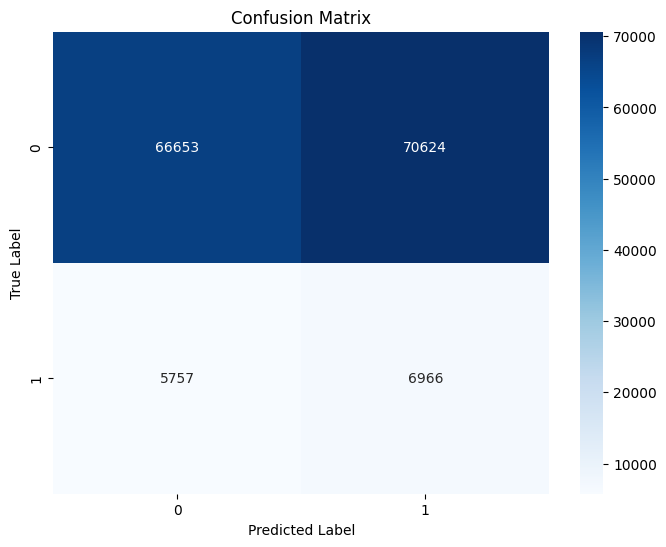

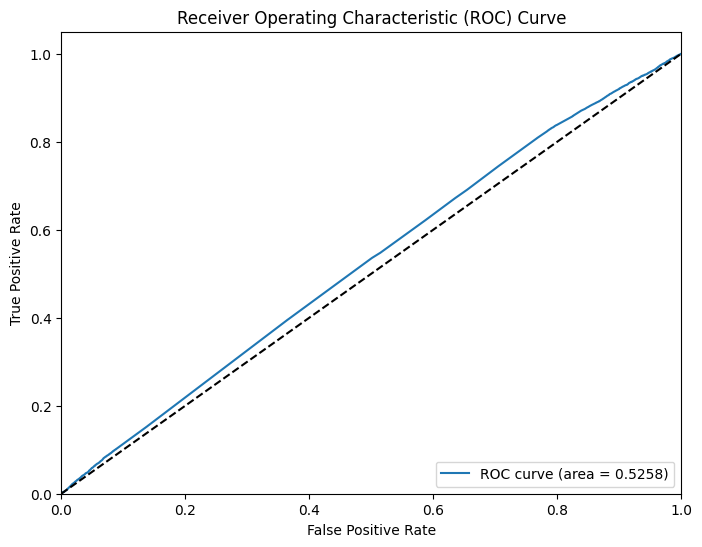

<Figure size 1200x800 with 0 Axes>

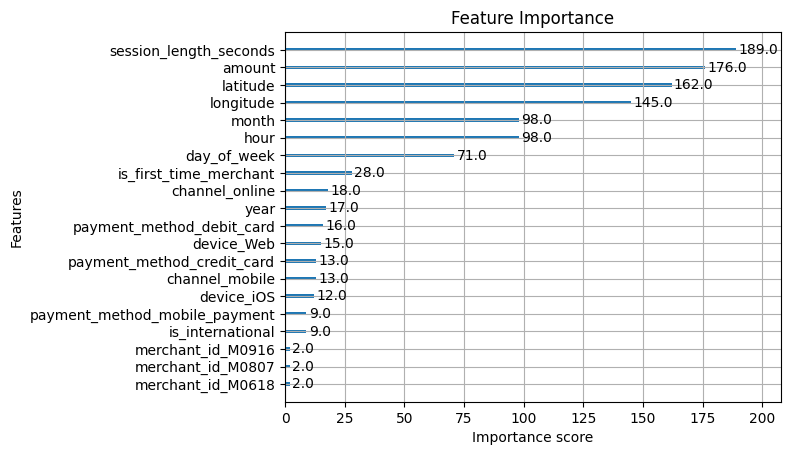

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
df = pd.read_json('../data/transactions.json', lines=True)  # Load your dataset here

# Step 1: Prepare the data
X = df.drop('is_fraud', axis=1)  # Features
y = df['is_fraud']  # Target

# Extract latitude and longitude from location dictionaries
X['latitude'] = X['location'].apply(lambda x: x['lat'])
X['longitude'] = X['location'].apply(lambda x: x['long'])
X = X.drop('location', axis=1)

# Convert timestamp to features
X['hour'] = X['timestamp'].dt.hour
X['day_of_week'] = X['timestamp'].dt.dayofweek
X['month'] = X['timestamp'].dt.month
X['year'] = X['timestamp'].dt.year
X = X.drop('timestamp', axis=1)

# Handle categorical features and ID columns
categorical_cols = ['channel', 'currency', 'device', 'payment_method', 'user_id', 'merchant_id']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Drop the transaction_id column as it's not useful for modeling
X = X_encoded.drop('transaction_id', axis=1)

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Train the XGBoost model
model_xgb = xgb.XGBClassifier(
     objective='binary:logistic',
     n_estimators=100,
     learning_rate=1,
     max_depth=5,
     random_state=42,
     scale_pos_weight= (sum(y_train == 0) / sum(y_train == 1))  # Adjust this based on the class imbalance
)

model_xgb.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

# Step 4: Make predictions
y_pred = model_xgb.predict(X_test)
y_pred_proba = model_xgb.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(model_xgb, max_num_features=20)
plt.title('Feature Importance')
plt.show()

[0]	validation_0-logloss:0.69289
[1]	validation_0-logloss:0.69267
[2]	validation_0-logloss:0.69247
[3]	validation_0-logloss:0.69229
[4]	validation_0-logloss:0.69211
[5]	validation_0-logloss:0.69196
[6]	validation_0-logloss:0.69182
[7]	validation_0-logloss:0.69170
[8]	validation_0-logloss:0.69154
[9]	validation_0-logloss:0.69146
[10]	validation_0-logloss:0.69135
[11]	validation_0-logloss:0.69127
[12]	validation_0-logloss:0.69113
[13]	validation_0-logloss:0.69101
[14]	validation_0-logloss:0.69092
[15]	validation_0-logloss:0.69080
[16]	validation_0-logloss:0.69067
[17]	validation_0-logloss:0.69056
[18]	validation_0-logloss:0.69043
[19]	validation_0-logloss:0.69033
[20]	validation_0-logloss:0.69025
[21]	validation_0-logloss:0.69016
[22]	validation_0-logloss:0.69005
[23]	validation_0-logloss:0.68994
[24]	validation_0-logloss:0.68982
[25]	validation_0-logloss:0.68969
[26]	validation_0-logloss:0.68961
[27]	validation_0-logloss:0.68951
[28]	validation_0-logloss:0.68939
[29]	validation_0-loglos

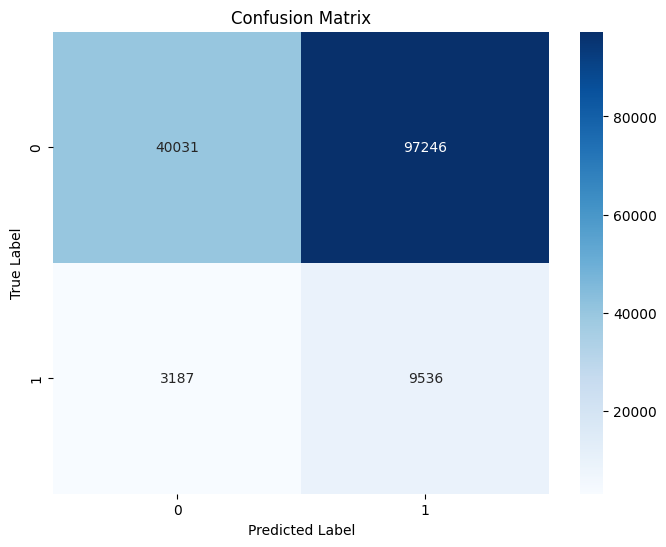

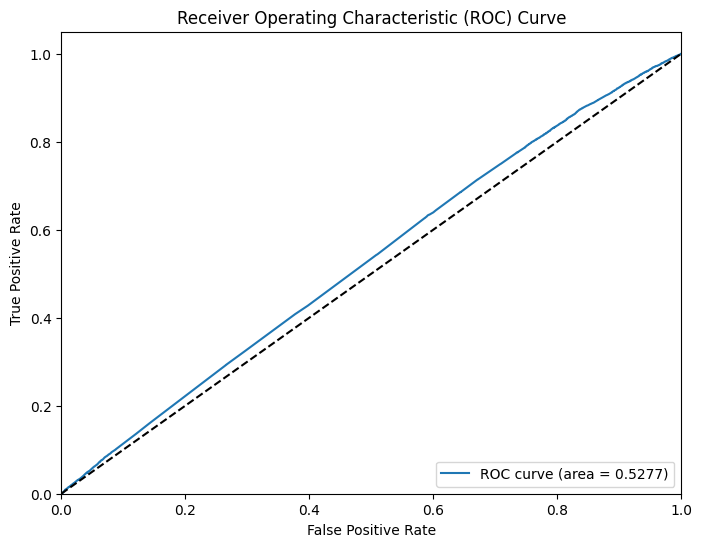

<Figure size 1200x800 with 0 Axes>

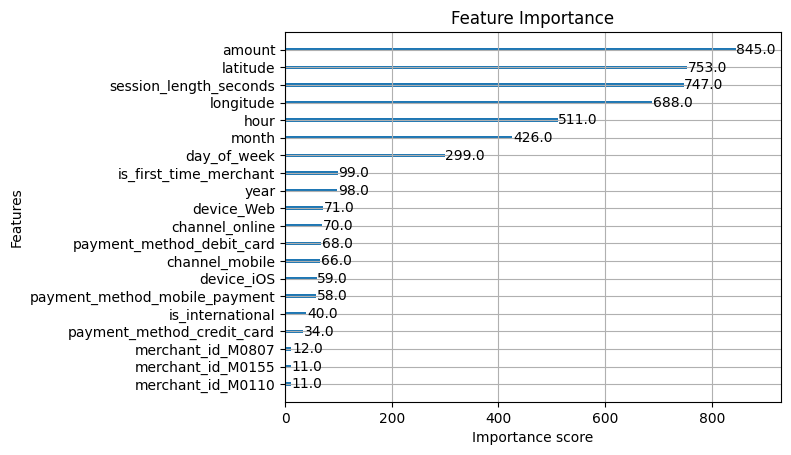

In [5]:
model_xgb = xgb.XGBClassifier(
     objective='binary:logistic',
     n_estimators=300,
     learning_rate=0.1,
     max_depth=6,
     random_state=42,
     scale_pos_weight= (sum(y_train == 0) / sum(y_train == 1))  # Adjust this based on the class imbalance
)

model_xgb.fit(X_train, y_train, verbose=True, eval_set=[(X_test, y_test)])

# Step 4: Make predictions
y_pred = model_xgb.predict(X_test)
y_pred_proba = model_xgb.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(model_xgb, max_num_features=20)
plt.title('Feature Importance')
plt.show()